<a href="https://colab.research.google.com/github/AaryanAnand10/Sentiment-Analysis-Using-Twitter-DataSet/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from IPython.display import display_html
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from nltk.util import ngrams
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
nltk.download('stopwords',"/kaggle/working/nltk_data/")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
train = pd.read_csv('/content/twitter_training.csv')
test = pd.read_csv('/content/twitter_validation.csv')


In [6]:
train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [8]:
train.columns = ['drop1', 'drop2', 'sentiment', 'content']
test.columns = ['drop1', 'drop2', 'sentiment', 'content']
train.drop(columns=['drop1', 'drop2'],inplace=True)
test.drop(columns=['drop1', 'drop2'],inplace=True)

train.head()

,sentiment,content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [9]:
print(f'train shape :{train.shape} | test shape :{test.shape}')

train shape :(74681, 2) | test shape :(999, 2)


In [10]:
x = (train.isnull().sum() / train.shape[0]) * 100
print("Training Data %NAN:")
print(x)
z = (test.isnull().sum() / test.shape[0]) * 100
print("Testing Data %NAN:")
print(z)

Training Data %NAN:
sentiment    0.000000
content      0.918574
dtype: float64
Testing Data %NAN:
sentiment    0.0
content      0.0
dtype: float64


In [11]:
train.dropna(inplace=True)
test.dropna(inplace=True)

org_train = train.copy()
org_test = test.copy()

In [12]:
def clean_text(text):
    text = text.lower()

    text = ' '.join(text.split())

    text = ' '.join([w for w in text.split() if len(w) > 1 or w in ['a', 'i']])

    text = ''.join([c for c in text if c.isalpha() or c.isspace()])

    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text
data = [train, test]
for df in data:
    df['content'] = df['content'].apply(clean_text)

In [13]:
data = [train, test]
for df in data:
    df['content'] = df['content'].apply(clean_text)

In [14]:
def lemmatize_and_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

    tokens = word_tokenize(lemmatized)

    return tokens

In [15]:
data = [train, test]
for df in data:
    df['content'] = df['content'].apply(lemmatize_and_tokenize)

In [16]:
train.head()

,sentiment,content
0,Positive,"[coming, border, kill]"
1,Positive,"[im, getting, borderland, kill]"
2,Positive,"[im, coming, borderland, murder]"
3,Positive,"[im, getting, borderland, murder]"
4,Positive,"[im, getting, borderland, murder]"


In [17]:
grouped_tokens = train.groupby('sentiment')['content'].sum()

In [18]:
word_freq = {sentiment: Counter(tokens) for sentiment, tokens in grouped_tokens.items()}

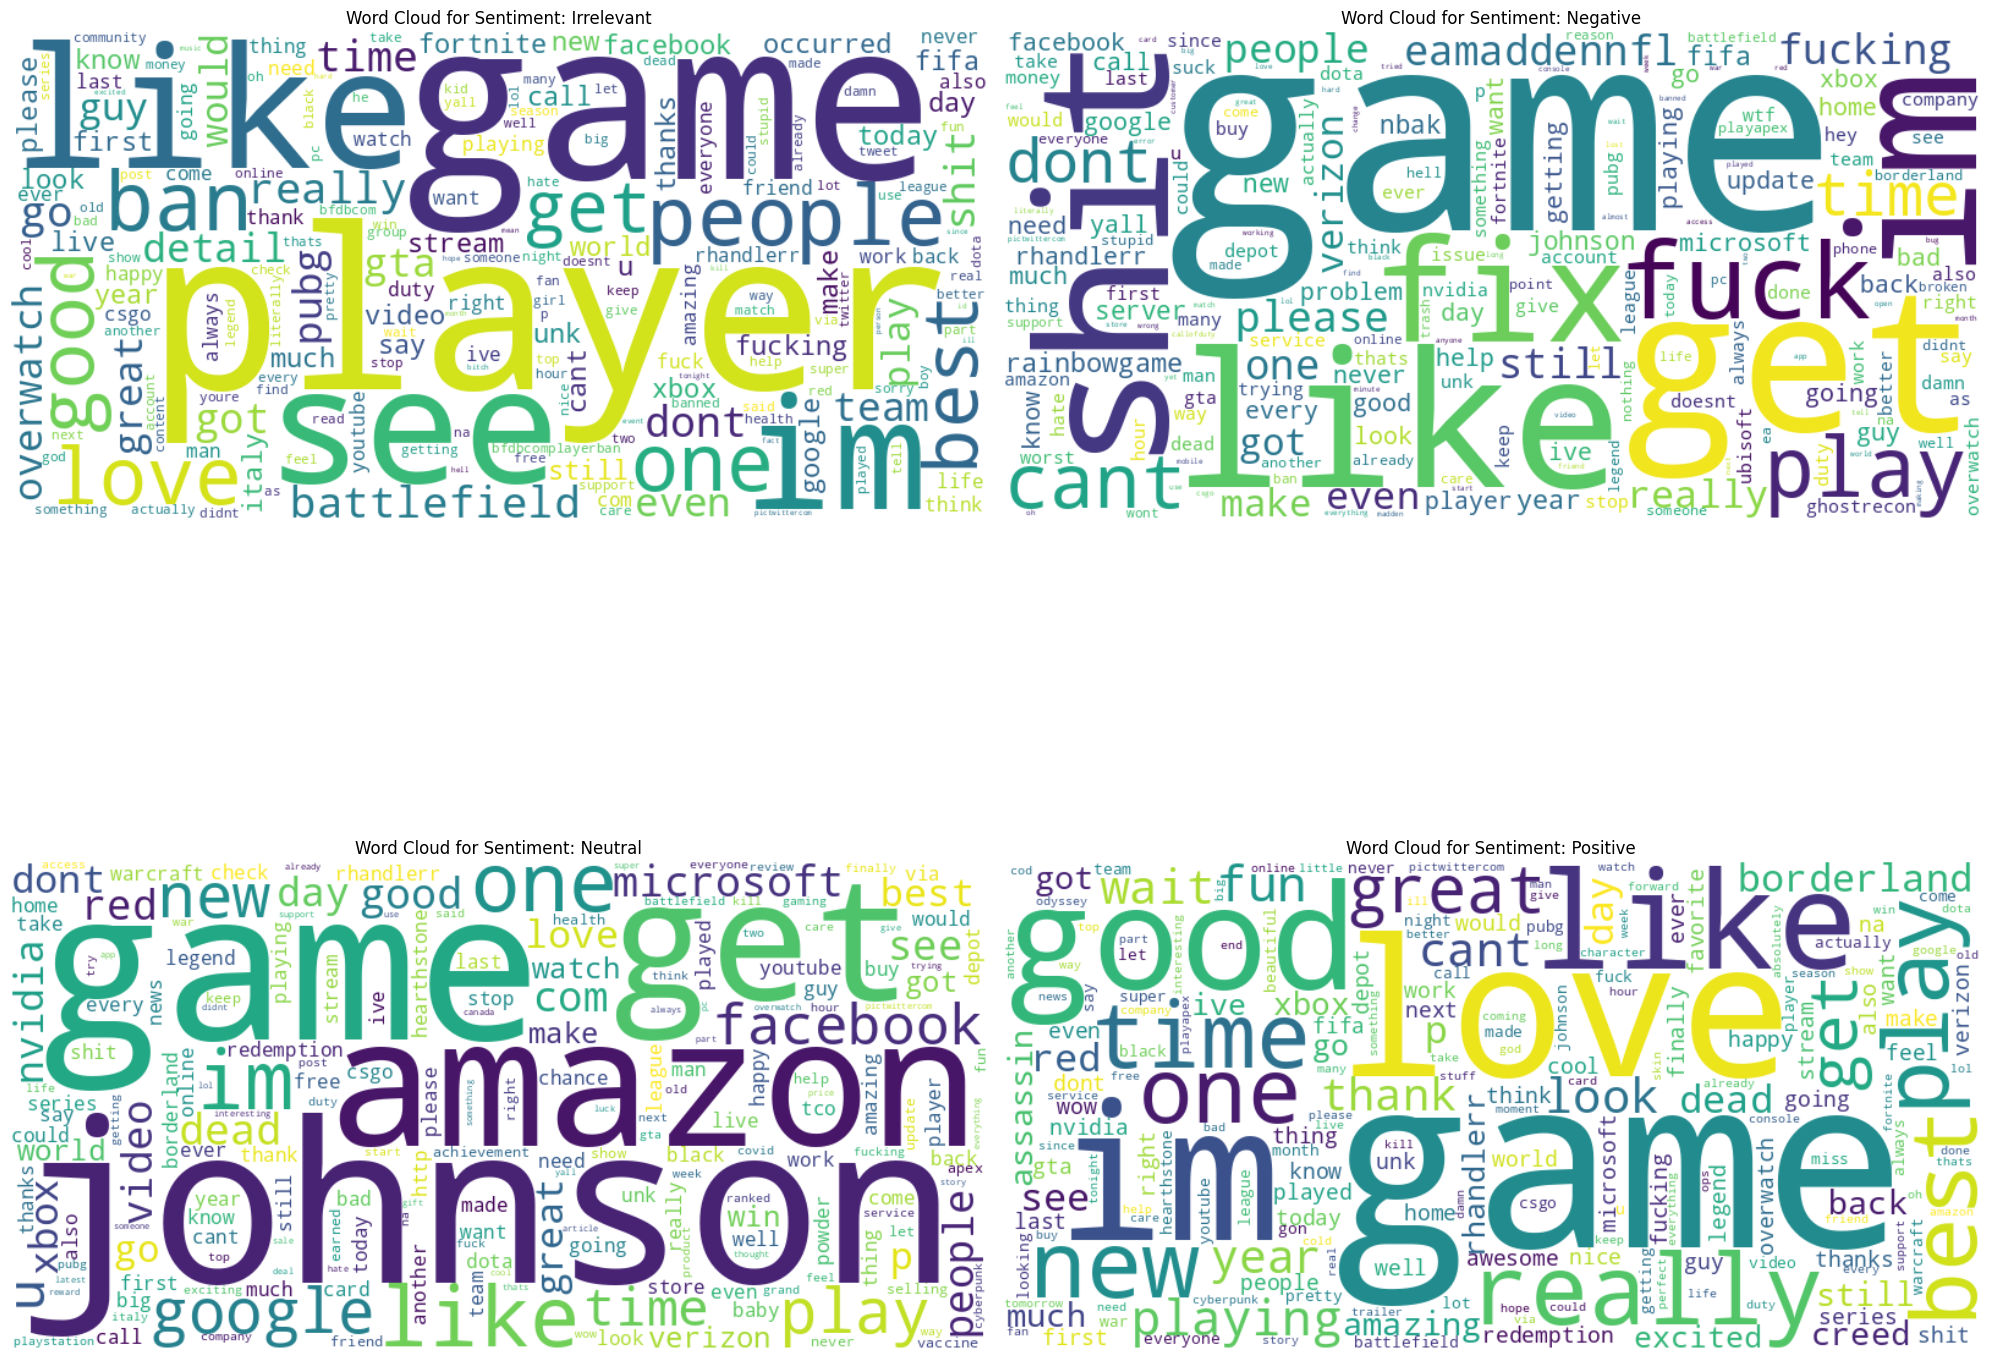

In [19]:
n_sentiments = len(word_freq)
cols = 2
rows = (n_sentiments + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 10 * rows))

for i, (sentiment, freq) in enumerate(word_freq.items()):
    ax = axes[i // cols, i % cols]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for Sentiment: {sentiment.capitalize()}')

for j in range(i + 1, rows * cols):
    axes[j // cols, j % cols].axis('off')

plt.tight_layout()
plt.show()

In [20]:
full_data = pd.concat([train, test])

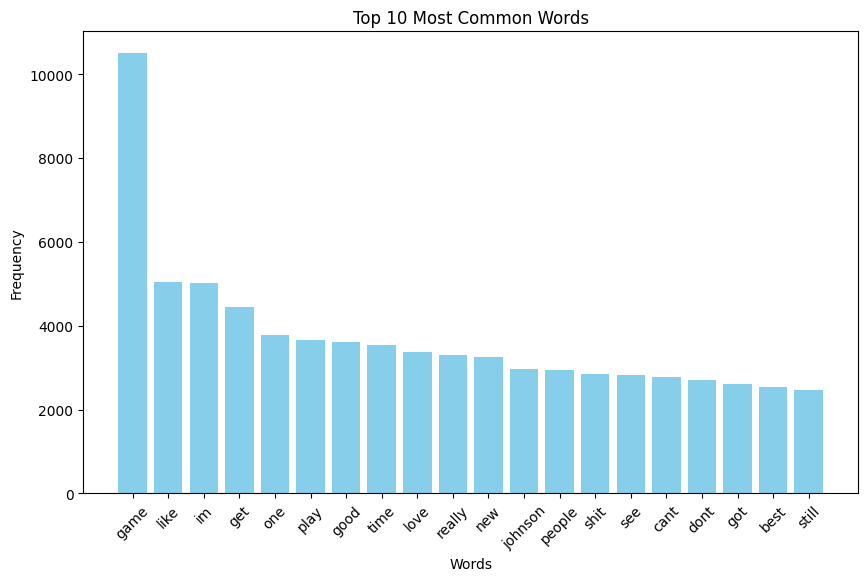

In [28]:
all_tokens = [token for sublist in full_data['content'] for token in sublist]
token_counts = Counter(all_tokens)

most_common_words = token_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [29]:
train['original_text'] = org_train['content']
test['original_text'] = org_test['content']

In [30]:
train['original_length'] = train['original_text'].apply(len)
train['cleaned_length'] = train['content'].apply(lambda x: len(' '.join(x)))

test['original_length'] = test['original_text'].apply(len)
test['cleaned_length'] = test['content'].apply(lambda x: len(' '.join(x)))

In [31]:
def jaccard_similarity_by_count(list1, list2):
    if not list1 and not list2:
        return 1
    if not list1 or not list2:
        return 0
    count1 = Counter(list1)
    count2 = Counter(list2)
    intersection = sum((count1 & count2).values())
    union = sum((count1 | count2).values())
    return intersection / union

In [32]:
train['jaccard_score'] = train.apply(lambda row: jaccard_similarity_by_count(row['original_text'].split(), row['content']), axis=1)
test['jaccard_score'] = test.apply(lambda row: jaccard_similarity_by_count(row['original_text'].split(), row['content']), axis=1)

In [33]:
train['jaccard_score'].describe()

count    73995.000000
mean         0.213118
std          0.151432
min          0.000000
25%          0.111111
50%          0.206897
75%          0.297872
max          1.000000
Name: jaccard_score, dtype: float64

In [34]:
zero_jaccard_df = train[train['jaccard_score'] == 0]
zero_jaccard_df.head()

,sentiment,content,original_text,original_length,cleaned_length,jaccard_score
10,Positive,[],was,3,0,0.0
11,Neutral,"[rockhard, la, varlope, rare, powerful, handso...","Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",94,79,0.0
12,Neutral,"[rockhard, la, varlope, rare, powerful, handso...","Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",94,80,0.0
13,Neutral,"[rockhard, la, varlope, rare, powerful, handso...","Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",93,79,0.0
14,Neutral,"[rockhard, la, vita, rare, powerful, handsome,...","Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",91,76,0.0


In [35]:
train_filtered = train[train['sentiment'].isin(['Positive', 'Negative'])]
test_filtered = test[test['sentiment'].isin(['Positive', 'Negative'])]

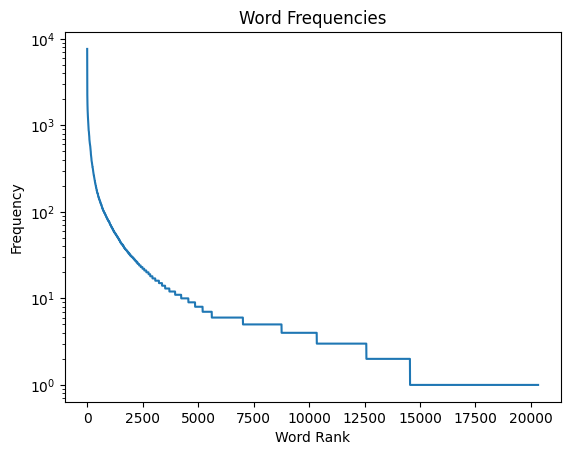

In [36]:
all_tokens = [token for sublist in train_filtered['content'] for token in sublist]
word_freq = Counter(all_tokens)

frequencies = list(word_freq.values())
frequencies.sort(reverse=True)

plt.plot(frequencies)
plt.title('Word Frequencies')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.yscale('log')

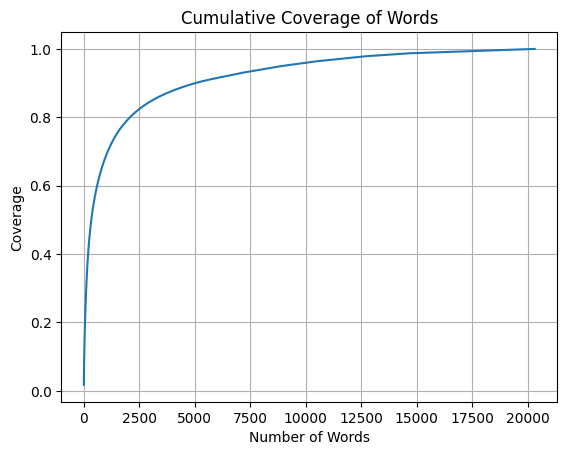

Coverage with top 1000 words: 68.77%
Coverage with top 5000 words: 89.96%
Coverage with top 7000 words: 92.86%
Coverage with top 10000 words: 95.97%
Coverage with top 15000 words: 98.80%
Coverage with top 20000 words: 99.93%


In [37]:
total_occurrences = sum(word_freq.values())
cumulative_counts = np.cumsum(sorted(word_freq.values(), reverse=True))
cumulative_coverage = cumulative_counts / total_occurrences

plt.plot(cumulative_coverage)
plt.title('Cumulative Coverage of Words')
plt.xlabel('Number of Words')
plt.ylabel('Coverage')
plt.grid(True)
plt.show()

for i in [1000, 5000, 7000, 10000, 15000, 20000]:
    coverage = cumulative_coverage[i] if i < len(cumulative_coverage) else cumulative_coverage[-1]
    print(f"Coverage with top {i} words: {coverage:.2%}")

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 7000

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<UNK>')

all_tokens = [token for sublist in pd.concat([train_filtered['content'], test_filtered['content']]) for token in sublist]
tokenizer.fit_on_texts(all_tokens)

train_filtered['content'] = tokenizer.texts_to_sequences(train_filtered['content'])
test_filtered['content'] = tokenizer.texts_to_sequences(test_filtered['content'])

<ipython-input-38-8236f964c87e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['content'] = tokenizer.texts_to_sequences(train_filtered['content'])
<ipython-input-38-8236f964c87e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtered['content'] = tokenizer.texts_to_sequences(test_filtered['content'])


In [39]:
vectorized_train = train_filtered.copy()
vectorized_test = test_filtered.copy()

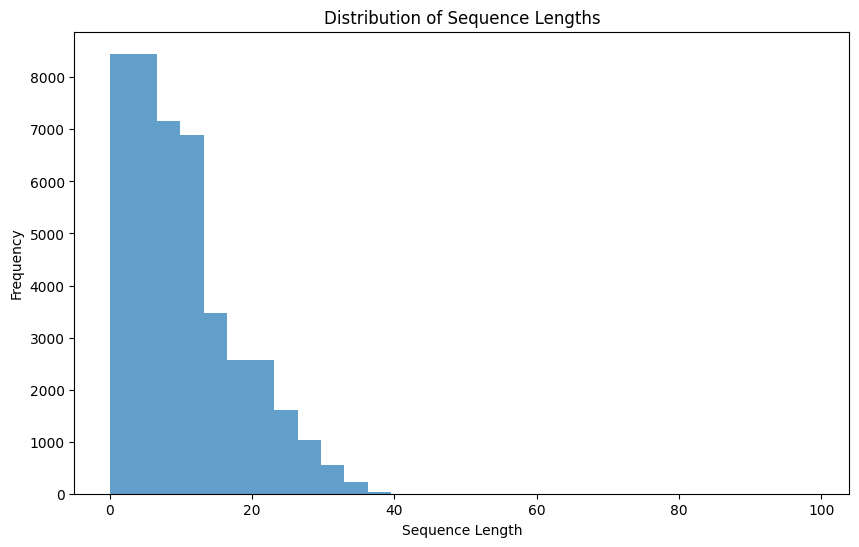

Mean length:  10.271505626336836
Median length:  8.0
Max length:  99


In [40]:
lengths = [len(v) for v in vectorized_train['content']]

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

import numpy as np

print("Mean length: ", np.mean(lengths))
print("Median length: ", np.median(lengths))
print("Max length: ", np.max(lengths))

In [41]:
max_length = int(np.percentile(lengths, 95))
print("95th percentile length: ", max_length)

95th percentile length:  26


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import ast


In [43]:
vectorized_train['content'] = vectorized_train['content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
vectorized_test['content'] = vectorized_test['content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [44]:
vectorized_train = vectorized_train[vectorized_train['content'].apply(len) > 0]
vectorized_train.reset_index(drop=True, inplace=True)

vectorized_test = vectorized_test[vectorized_test['content'].apply(len) > 0]
vectorized_test.reset_index(drop=True, inplace=True)

In [45]:
X = pad_sequences(vectorized_train['content'], maxlen=max_length, padding='post', dtype='float32')
X_test2 = pad_sequences(vectorized_test['content'], maxlen=max_length, padding='post', dtype='float32')

In [46]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(vectorized_train['sentiment'])
y_test2 = label_encoder.fit_transform(vectorized_test['sentiment'])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
vocab_size = 7000
embedding_dim = 50
max_length = 26

In [50]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.5 MB/s eta 0:00:00


In [51]:
import optuna
def objective(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_neurons = trial.suggest_int('num_neurons', 16, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    regularization_rate = trial.suggest_float('regularization_rate', 0.001, 0.01)
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    for i in range(num_layers):
        model.add(Bidirectional(LSTM(num_neurons, return_sequences=(i < num_layers-1))))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        min_delta=0.001,
        mode='min',
        verbose=1,
        restore_best_weights=True
    )
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    return min(history.history['val_loss'])

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1)

print('Best trial:')
best_trial = study.best_trial
print('  Value: {:.6f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-06-03 14:52:36,974] A new study created in memory with name: no-name-b9b23948-89aa-4529-888d-4e0f125cc8b1


Epoch 1/10
840/921 [==========================>...] - ETA: 15s - loss: 0.3832 - accuracy: 0.8289

In [ ]:
num_layers = 2
num_neurons = 124
dropout_rate = 0.23113088976644125
regularization_rate = 0.005990606683251042

In [ ]:
def build_model(num_layers, num_neurons, dropout_rate, regularization_rate):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    for i in range(num_layers):
        model.add(Bidirectional(LSTM(num_neurons, return_sequences=(i < num_layers - 1))))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

predictions_proba = model.predict(X_test2)
predictions = (predictions_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test2, predictions)
precision = precision_score(y_test2, predictions)
recall = recall_score(y_test2, predictions)
f1 = f1_score(y_test2, predictions)
conf_matrix = confusion_matrix(y_test2, predictions)
auc = roc_auc_score(y_test2, predictions_proba)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))